In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
%matplotlib inline

In [3]:
with mpl.rc_context() as rc:
    mpl.rc('font', size=20)
    mpl.rc('savefig', pad_inches=0)

    rnn_lc = pd.read_csv('data/rnn-learning-curve.csv', index_col='n_samples', squeeze=True, header=None, names=['n_samples', 'E.T.-RNN'])
    lgbm_lc = pd.read_csv('data/lgbm-learning-curve.csv', index_col='n_samples', squeeze=True, header=None, names=['n_samples', 'LGBM'])
    lc = pd.DataFrame([rnn_lc, lgbm_lc]).T
    ax = lc.plot(figsize=(10,10), grid=True)
    ax.set_ylabel('ROC AUC')
    ax.set_xlabel('Number of appications used for training')
    ax.set_xticklabels(['0'] + [f'{n}K' for n in (rnn_lc.index // 1000)])
    
    mpl.pyplot.savefig('learning-curve.png', bbox_inches='tight')

FileNotFoundError: File b'data/rnn-learning-curve.csv' does not exist

In [4]:
with mpl.rc_context() as rc:
    mpl.rc('font', size=20)

    lc = pd.read_csv('data/rnn-min-max-share-cutoff.csv', index_col='cutoff')
    #lc = lc.drop([500, 600])
    lc['coverage'] = 1 - lc.share
    lc = lc.drop([400, 800]).drop('share', axis=1)

    ax = lc['max_roc_auc'].plot(figsize=(10,10), grid=True)
    ax.set_ylabel('ROC AUC')

    #ax2 = ax.twinx()
    ax2 = lc['coverage'].plot(ax=ax, figsize=(10,10), secondary_y=True, grid=True)
    ax2.set_ylabel('Coverage')
    ax.set_xlabel('Number of transactions per client')
    ax2.set_yticklabels(['0'] + [f'{n:.0f}%' for n in (lc.coverage * 100)][::-1])

    mpl.pyplot.savefig('figures/information-vs-accuracy-max.png', bbox_inches='tight')

FileNotFoundError: File b'data/rnn-min-max-share-cutoff.csv' does not exist

In [5]:
stats_ensemble = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size in (1, 3, 6, 12) and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5')

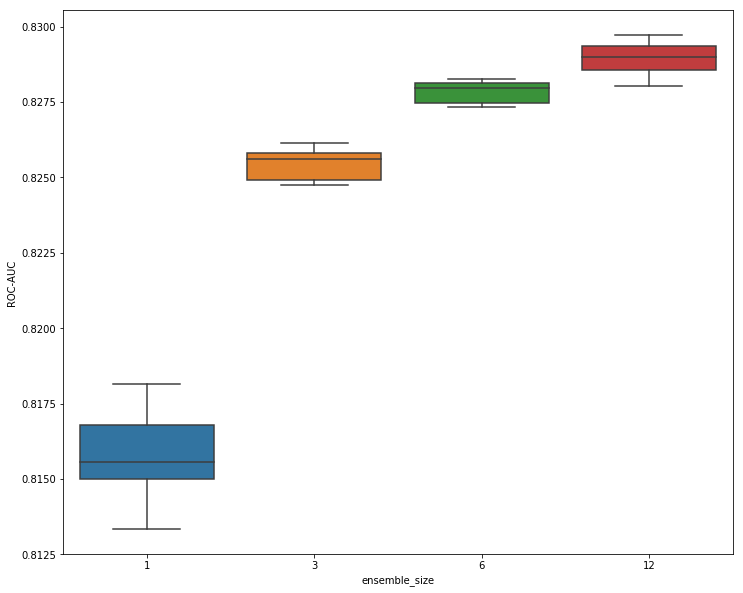

In [6]:
with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(12,10))
    sns.boxplot(x="ensemble_size", y="ROC-AUC", data = stats_ensemble)

In [7]:
stats_arch_gru_1_uni = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5').head(6)
stats_arch_gru_1_uni['ROC-AUC'].describe()

count    6.000000
mean     0.815482
std      0.001567
min      0.813333
25%      0.814370
50%      0.815763
75%      0.816422
max      0.817487
Name: ROC-AUC, dtype: float64

In [8]:
stats_arch_lstm_1_uni = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'lstm\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5')
stats_arch_lstm_1_uni['ROC-AUC'].describe()

count    6.000000
mean     0.805521
std      0.002239
min      0.802142
25%      0.804097
50%      0.806140
75%      0.807087
max      0.807885
Name: ROC-AUC, dtype: float64

In [9]:
stats_arch_gru_1_bi = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == True and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5')
stats_arch_gru_1_bi['ROC-AUC'].describe()

count    6.000000
mean     0.816019
std      0.000448
min      0.815428
25%      0.815673
50%      0.816090
75%      0.816398
max      0.816471
Name: ROC-AUC, dtype: float64

In [10]:
stats_arch_lstm_1_bi = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'lstm\' and bidir == True and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5')
stats_arch_lstm_1_bi['ROC-AUC'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ROC-AUC, dtype: float64

In [11]:
stats_arch_ranking001 = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5').head(6)
stats_arch_ranking001['ROC-AUC'].describe()

count    6.000000
mean     0.815482
std      0.001567
min      0.813333
25%      0.814370
50%      0.815763
75%      0.816422
max      0.817487
Name: ROC-AUC, dtype: float64

In [12]:
stats_arch_ranking05 = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.5 and lr_step_gamma == 0.5')
stats_arch_ranking05['ROC-AUC'].describe()

count    6.000000
mean     0.810357
std      0.002649
min      0.805149
25%      0.810450
50%      0.811346
75%      0.811706
max      0.812325
Name: ROC-AUC, dtype: float64

In [13]:
stats_arch_ranking01 = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.1 and lr_step_gamma == 0.5')
stats_arch_ranking01['ROC-AUC'].describe()

count    6.000000
mean     0.816791
std      0.001697
min      0.814495
25%      0.815500
50%      0.817434
75%      0.817763
max      0.818652
Name: ROC-AUC, dtype: float64

In [17]:
stats_arch_bce = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'bce\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5')
stats_arch_bce['ROC-AUC'].describe()

count    6.000000
mean     0.812449
std      0.001609
min      0.809624
25%      0.812004
50%      0.812754
75%      0.813493
max      0.814071
Name: ROC-AUC, dtype: float64

In [18]:
stats_arch_both = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'both\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5')
stats_arch_both['ROC-AUC'].describe()

count    6.000000
mean     0.814446
std      0.003039
min      0.810350
25%      0.813046
50%      0.814413
75%      0.815185
max      0.819467
Name: ROC-AUC, dtype: float64

In [19]:
stats_lr_regime_gamma_1 = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 1')
stats_lr_regime_gamma_1['ROC-AUC'].describe()

count    6.000000
mean     0.804161
std      0.002635
min      0.800542
25%      0.802249
50%      0.804557
75%      0.806101
max      0.807213
Name: ROC-AUC, dtype: float64

In [20]:
stats_lr_regime_gamma_08 = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.8')
stats_lr_regime_gamma_08['ROC-AUC'].describe()

count    6.000000
mean     0.814391
std      0.001467
min      0.812448
25%      0.813226
50%      0.814711
75%      0.815624
max      0.815815
Name: ROC-AUC, dtype: float64

In [21]:
stats_lr_regime_gamma_05 = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and embed_dropout == 0 \
and trx_dropout == 0.01 and permute_trials_proportion == 0 and lr == 0.004 and loss ==\'ranking\' \
and loss_margin == 0.01 and lr_step_gamma == 0.5 ').head(6)
stats_lr_regime_gamma_05['ROC-AUC'].describe()

count    6.000000
mean     0.815482
std      0.001567
min      0.813333
25%      0.814370
50%      0.815763
75%      0.816422
max      0.817487
Name: ROC-AUC, dtype: float64

In [22]:
stats_do = pd.read_json('article-stats.json').query('n_epoch == 10 \
and ensemble_size == 1 and rnn_type == \'gru\' and bidir == False and lr_step_gamma == 0.6000000000000001 \
and lr == 0.004 and loss ==\'ranking\' and loss_margin == 0.01')
stats_do['ROC-AUC'].describe()


count    24.000000
mean      0.814115
std       0.003024
min       0.807897
25%       0.811238
50%       0.815281
75%       0.816311
max       0.818119
Name: ROC-AUC, dtype: float64

In [23]:
stats_do['reg_type'] = 'no regularization'
stats_do.loc[stats_do['trx_dropout']==0.25,'reg_type'] = 'trx dropout 0.25'
stats_do.loc[stats_do['embed_dropout']==0.25,'reg_type'] = 'embed dropout 0.25'
stats_do.loc[stats_do['permute_trials_proportion']==0.25,'reg_type'] = 'trx switch 0.25'

In [24]:
tl = stats_do.metrics.map(lambda e: e['valid_auc'])
tl_es = [(i, e, es) for l, es in zip(tl.tolist(), stats_do.reg_type) for i, e in enumerate(l)]
tl_df = pd.DataFrame(tl_es, columns=['epoch', 'ROC-AUC', 'reg_type'])

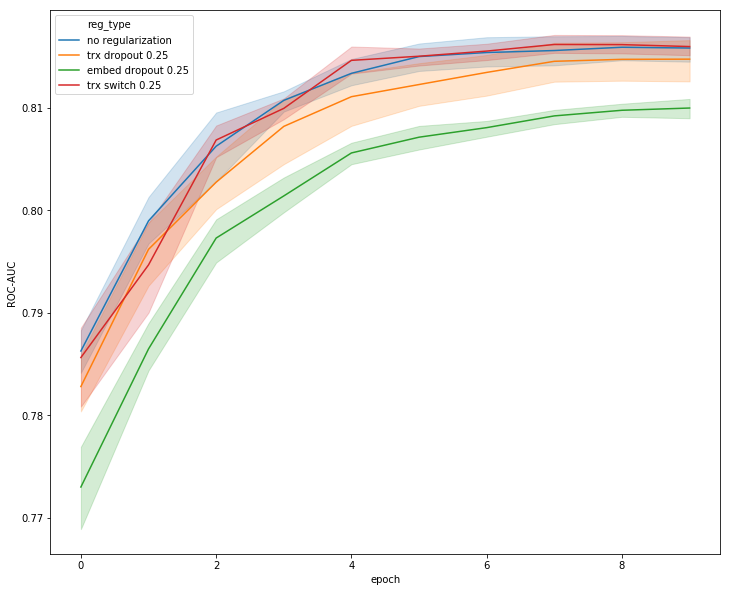

In [25]:
with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(12,10))
    sns.lineplot(x="epoch", y="ROC-AUC", data=tl_df, hue="reg_type", legend="full")

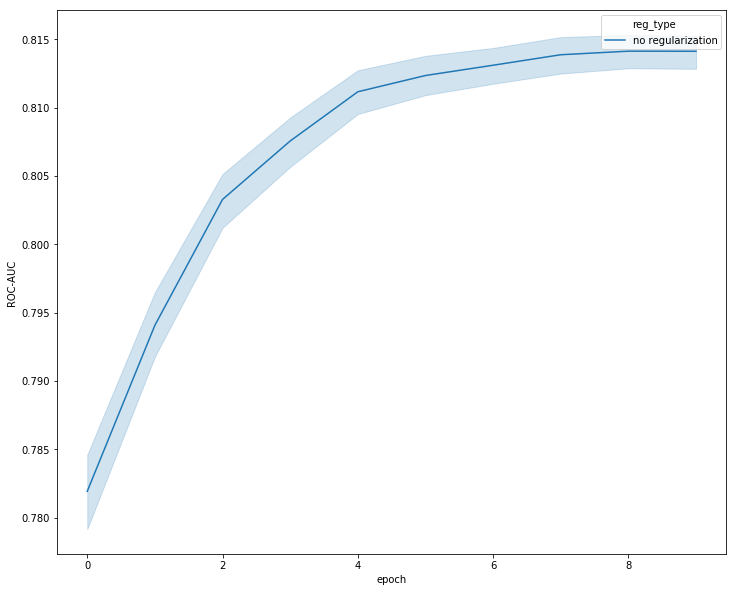

In [95]:
stats_do['reg_type'] = 'no regularization'
tl = stats_do.metrics.map(lambda e: e['valid_auc'])
tl_es = [(i, e, es) for l, es in zip(tl.tolist(), stats_do.reg_type) for i, e in enumerate(l)]
tl_df = pd.DataFrame(tl_es, columns=['epoch', 'ROC-AUC', 'reg_type'])
with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(12,10))
    sns.lineplot(x="epoch", y="ROC-AUC", data=tl_df, hue="reg_type", legend="full")